# Noise models

## Overview

Quantum devices, inevitably, are impacted by experimental imperfections, interactions with the environment, and other sources of noise. 
Generating large entangled states, in particular, is challenged by experimental noise.
Simulated the effects of noise is useful for characterizing the performance of a quantum device, and for designing circuits which are robust to noise.
In this notebook, we will look at how to use noise models in the Graphiq framework.


# Initializing noise models
Noise models are 

noiseless circuit output


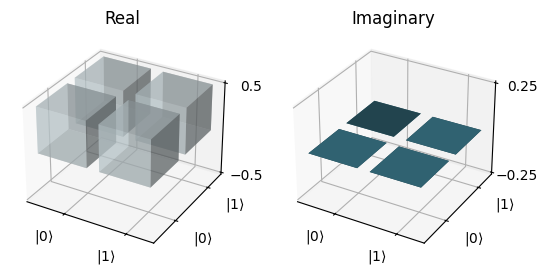

noisy circuit output


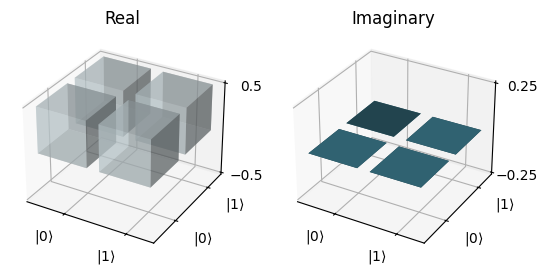

In [1]:
""" Noise model creation examples """
import numpy as np

import graphiq.noise.noise_models as nm
import graphiq.backends.density_matrix.functions as dmf

# No noise
no_noise = nm.NoNoise()

# replace a gate by another, e.g., to model a systematic error in a gate implementation
modified_identity = dmf.parameterized_one_qubit_unitary(10 * np.pi / 180, 0, 0)
qubit1_replacement = nm.OneQubitGateReplacement(modified_identity)

# Let's now build a circuit, with and without the noise
from graphiq.circuit.circuit_dag import CircuitDAG
import graphiq.circuit.ops as ops
from graphiq.backends.density_matrix.compiler import DensityMatrixCompiler

compiler = DensityMatrixCompiler()

dag_noiseless = CircuitDAG(n_emitter=1, n_photon=0, n_classical=0)
dag_noiseless.add(ops.Hadamard(register=0, reg_type="e", noise=no_noise))
dag_noiseless.add(ops.Identity(register=0, reg_type="e", noise=no_noise))

dag_noisy = CircuitDAG(n_emitter=1, n_photon=0, n_classical=0)
dag_noisy.add(ops.Hadamard(register=0, reg_type="e", noise=no_noise))
dag_noisy.add(ops.Identity(register=0, reg_type="e", noise=qubit1_replacement))

print(f"noiseless circuit output")
compiler.compile(dag_noiseless).rep_data.draw()

print(f"noisy circuit output")
compiler.compile(dag_noisy).rep_data.draw();

### Additive vs Replacement noise

There are two main groups of noise: `AdditionNoiseBase` and `ReplacementNoiseBase`.

`AdditionNoiseBase` channels are appended either before or after the regular gate. It does not, however, get rid of the regular gate. Examples of this includes local Clifford errors, depolarizing noise, etc.

`ReplacementNoiseBase` channels are, instead, replace the gate. It can be used to represent slightly faulty gates in the system.

These two classes are treated somewhat separately in the compilers; it is therefore useful to be aware of the distinction. Note that some incoming noise models (e.g. measurement error noise, or photon loss) may not fall into the categories above. However, for the time being, most noise should be one of these two types.